<a href="https://colab.research.google.com/github/MasiboBrian/Classifications/blob/main/DecisionTree_ID3_and_C4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://www.kisbu.edu.tr/wp-content/uploads/2018/05/kharazmi.png)


Decision Tree ID3 & C4.5 Algorithm implementation by python

Test on:

Part1 : Poisonous Mushroom Detection

Part 2: Insect classification


***Ali Forghani ElahAbadi***



Machine Learning Course (M.M.Pedram)
Kharazmi University, Tehran, IRAN



**1.Mount google colabratory to Google Drive to read the dataset File**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install beautifultable

**2.import important library**

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')
import pandas as pd
from graphviz import Digraph
import pydot
import networkx as nx
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy
import math
import cv2

**3.implement the decision tree algorithm & Evaluation Function**

In [ ]:
import numpy as np
from graphviz import Digraph

class decisionTree:
    #contructor function
    def __init__(self, features_name_list = [], label_name = '', dataframe = pd.DataFrame() , algorithm = ''):
        self.featuresList = features_name_list
        self.labelName = label_name
        self.data = dataframe
        self.alg = algorithm
        self.graph = pydot.Dot(graph_type='digraph')
        self.counter = 1
        self.counter2 = 1
        self.edges = []
        self.flag = False
        self.label_value = np.unique(self.data[self.labelName])


    def Entropy(self, feature_name = '', dataframe =  pd.DataFrame()):
        d = dataframe[feature_name]
        unique = np.unique(d[:])
        entropy = 0
        for value in unique:
            temp = (d == value).sum()
            temp /= d.shape[0]
            entropy -= (temp * math.log2(temp))
        return entropy

    def Conditional_Entropy(self, feature_name = '', feature_value = '', dataframe =  pd.DataFrame()):
        d = dataframe.loc[dataframe[feature_name] == feature_value]
        unique = np.unique(d[self.labelName])
        entropy = 0
        for value in unique:
            temp = (d[self.labelName] == value).sum()
            temp /= d[self.labelName].shape[0]
            entropy -= (temp * math.log2(temp))
        return entropy

    def Feature_Based_Entropy(self, feature_name = '', dataframe =  pd.DataFrame()):
        unique = np.unique(dataframe[feature_name])
        entropy = 0
        for value in unique:
            p = ((dataframe[feature_name] == value).sum())/(dataframe[feature_name].shape[0])
            entropy += p * self.Conditional_Entropy(feature_name, value, dataframe)
        return entropy

    def Information_Gain(self, feature_name = '', dataframe =  pd.DataFrame()):
        return (self.Entropy(self.labelName, dataframe) - self.Feature_Based_Entropy(feature_name, dataframe))

    def Gain_Ratio(self, feature_name = '', dataframe =  pd.DataFrame()):
        return (self.Information_Gain(feature_name, dataframe) / self.Entropy(feature_name, dataframe))

    def Create_Tree(self, knowledge_features = [], knowledge_values = [], root_label = ''):
      d = self.data.copy()
      self.counter += 1
      des = ''
      temp = self.featuresList.copy()
      for i in range(0, len(knowledge_features)):
          temp.remove(knowledge_features[i])
          d = d.loc[d[knowledge_features[i]] == knowledge_values[i]]

      if self.Entropy(self.labelName, d) == 0 or len(temp) == 0:
          if len(knowledge_values) > 0:
              #print(root_label + ' to ' +  str(np.unique(d[self.labelName])[0]) + str(self.counter) + ' by ' +  str(knowledge_values[-1]))
              edge = pydot.Edge(root_label, str(np.unique(d[self.labelName])[0]) + ' : ' + str(knowledge_values[-1])
                              + ' : ' + str(self.counter) , label = str(knowledge_values[-1]))
              self.graph.add_edge(edge)
              self.edges.append([root_label , str(np.unique(d[self.labelName])[0]) + ' : ' + str(knowledge_values[-1])
                            + ' : '  + str(self.counter) ,  str(knowledge_values[-1])])
          else:
              #print(root_label + ' to ' +  str(np.unique(d[self.labelName])[0]) + str(self.counter))
              edge = pydot.Edge(root_label, str(np.unique(d[self.labelName])[0]) + ' : ' + str(self.counter))
              self.graph.add_edge(edge)
              self.edges.append([root_label , str(np.unique(d[self.labelName])[0]) + str(self.counter), 'root'])



      else:
          maximum_confidence = -1
          maximum_confidence_index = -1
          for i in range(0, len(temp)):
              if self.alg == 'ID3':
                  confidence_value = self.Information_Gain(temp[i], d)
              elif self.alg == 'C4.5':
                  confidence_value = self.Gain_Ratio(temp[i], d)
              if confidence_value >= maximum_confidence:
                  maximum_confidence = confidence_value
                  maximum_confidence_index = i

          if len(knowledge_values) > 0:
              des = temp[maximum_confidence_index]  + ' : ' + str(knowledge_values[-1]) + ' : ' + str(self.counter)
              #print(root_label + ' to ' + des + ' by ' +  str(knowledge_values[-1]) )
              edge = pydot.Edge(root_label, des, label = str(knowledge_values[-1]))
              self.edges.append([root_label ,  des , str(knowledge_values[-1])])
          else:
              des = temp[maximum_confidence_index] + ' : ' + str(self.counter)
              #print(root_label + ' to ' +  temp[maximum_confidence_index])
              edge = pydot.Edge(root_label, des)
              self.edges.append([root_label, des, 'root'])

          self.graph.add_edge(edge)

          feature_value = knowledge_features
          feature_value.append(temp[maximum_confidence_index])
          label_value = knowledge_values
          label_value.append('')

          for i in np.unique(d[temp[maximum_confidence_index]]):
            label_value[len(label_value)-1] = i
            self.Create_Tree(feature_value.copy() , label_value.copy(), des)





    def Plot_Tree(self):
        #print(self.edges)
        fig = plt.figure(figsize=(18, 18))
        self.graph.write_png('/content/drive/MyDrive/example2_graph.png')
        img = cv2.imread('/content/drive/MyDrive/example2_graph.png')
        plt.imshow(img)


    def evaluate_binary_class(self, test_data = pd.DataFrame(), pos_value = '' , neg_value = ''):
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        OW = 0

        for i in range (0, test_data.shape[0]):
            flag = True
            current_state = self.edges[0][1]
            current_feature = current_state.split(' : ')[0]
            #print(current_state)
            #print(current_feature)
            #print('_____________________')
            d = test_data.iloc[i:i+1,:]

            while (current_feature != pos_value and current_feature != neg_value and flag != False):


                column = [current_feature]
                value = pd.DataFrame(d, columns=column).values[0][0]
                #print(value)
                flag = False
                for edge in self.edges:
                    if edge[0] == current_state and edge[2] == value:
                        current_state = edge[1]
                        #print(current_state)
                        current_feature = current_state.split(' : ')[0]
                        flag = True

            if current_feature == pos_value and d[self.labelName].values == pos_value:
                TP += 1
            elif current_feature == pos_value and d[self.labelName].values == neg_value:
                FP += 1
            elif current_feature == neg_value and d[self.labelName].values == neg_value:
                TN += 1
            elif current_feature == neg_value and d[self.labelName].values == pos_value:
                FN += 1
            else:
                OW += 1

        #---------->>>>>>>
        #return TP, TN, FP, FN
        return str(TP) + ',' + str(FP) + ',' + str(TN) + ',' + str(FN) + ',' + str(OW)


    def show_confusion_matrix(self, test_data = pd.DataFrame(), pos_value = '', neg_value = ''):
        ls = self.evaluate_binary_class(test_data, pos_value, neg_value).split(',')
        from beautifultable import BeautifulTable
        table = BeautifulTable()
        table.column_headers = ["label", "classifier output positive", "classifier output negative"]
        table.append_row(["Actual Positive", str(ls[0]), str(ls[3])])
        table.append_row(["Actual Negative", str(ls[1]), str(ls[2])])
        print(table)


    def recall_binary_class(self, test_data = pd.DataFrame(), pos_value = '', neg_value = ''):
        ls = self.evaluate_binary_class(test_data, pos_value, neg_value).split(',')
        TP = int(ls[0])
        TN = int(ls[2])
        FP = int(ls[1])
        FN = int(ls[3])
        OW = int(ls[4])
        recall = TP / (TP + FN + OW)
        return recall

    def precision_binary_class(self, test_data = pd.DataFrame(), pos_value = '', neg_value = ''):
        ls = self.evaluate_binary_class(test_data, pos_value, neg_value).split(',')
        TP = int(ls[0])
        TN = int(ls[2])
        FP = int(ls[1])
        FN = int(ls[3])
        precision = TP / (TP + FP)
        return precision

    def npv_binary_class(self, test_data = pd.DataFrame(), pos_value = '', neg_value = ''):
        ls = self.evaluate_binary_class(test_data, pos_value, neg_value).split(',')
        TP = int(ls[0])
        TN = int(ls[2])
        FP = int(ls[1])
        FN = int(ls[3])
        OW = int(ls[4])
        npv = TN / (TN + FN + OW)
        return npv

    def spec_binary_class(self, test_data = pd.DataFrame(), pos_value = '', neg_value = ''):
        ls = self.evaluate_binary_class(test_data, pos_value, neg_value).split(',')
        TP = int(ls[0])
        TN = int(ls[2])
        FP = int(ls[1])
        FN = int(ls[3])
        spec = TP / (TP + FP)
        return spec

    def accuracy_binary_class(self, test_data = pd.DataFrame(), pos_value = '', neg_value = ''):
        ls = self.evaluate_binary_class(test_data, pos_value, neg_value).split(',')
        TP = int(ls[0])
        TN = int(ls[2])
        FP = int(ls[1])
        FN = int(ls[3])
        OW = int(ls[4])
        accuracy = ((TP + TN) / (TP + FP + TN + FN + OW))
        return accuracy
















# Step 1: Test the Algorithm in Poisonous Mushroom Detection
[mushroom dataset download link](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)

## 1.Load, Shuffling the Data & Split Data to Train & test

In [ ]:
import pandas as pd
data_1 = pd.read_csv('/content/drive/MyDrive/agaricus-lepiota.csv')
from sklearn.utils import shuffle
data_1 = shuffle(data_1)
data_1_train = data_1.iloc[0:7000,0:23]
data_1_test = data_1.iloc[7000:,0:23]
print(data_1_train.shape)
print(data_1_test.shape)
data_1.head()

(7000, 23)
(1124, 23)


,%cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class-label
804,e,b,y,w,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2615,e,x,y,n,t,n,f,c,b,w,t,b,s,s,w,p,p,w,o,p,k,y,d
3441,p,x,f,p,f,c,f,c,n,n,e,b,s,s,w,w,p,w,o,p,n,s,d
1286,p,x,y,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
1764,e,x,s,w,f,n,f,w,b,p,t,e,f,f,w,w,p,w,o,e,n,s,g


## 2.Set Label Columns & generate features list

In [ ]:
output_label_name = '%cap-shape'
file = open('/content/drive/MyDrive/agaricus-lepiota.csv', 'r')
labels = (((file.readlines(1)[0]))[:-1].split(','))
labels.remove(output_label_name)
features_name_list = labels
print(features_name_list)


['cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat', 'class-label']


## 3.Create Decision Tree by C4.5 Algorithm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


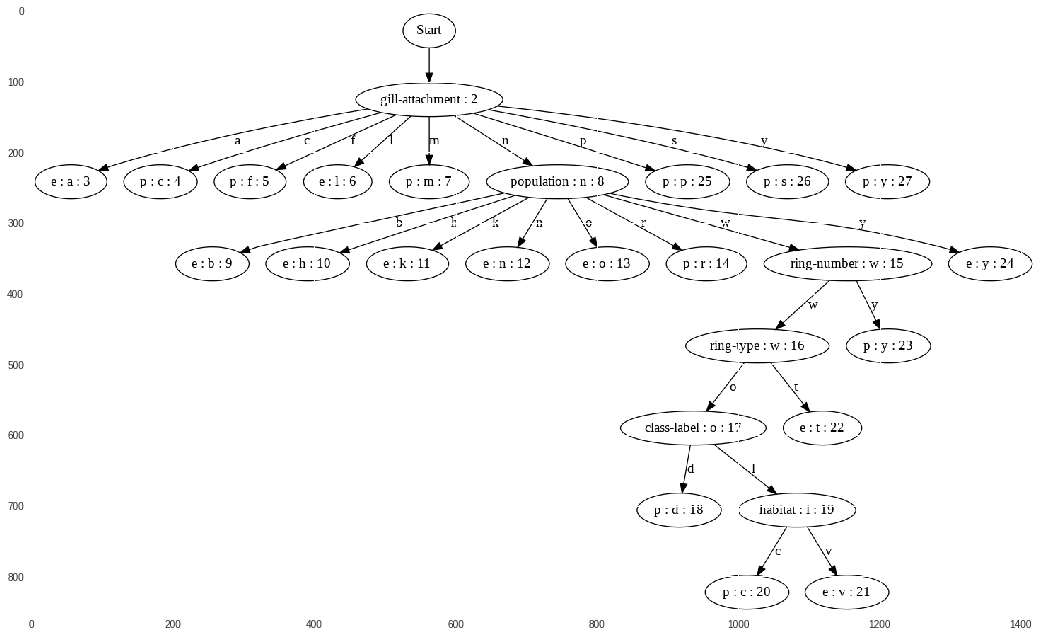

In [ ]:

dt = decisionTree(features_name_list, output_label_name , data_1_train, 'C4.5')
dt.Create_Tree([], [], 'Start')
dt.Plot_Tree()

## 4.Evaluation Step and show Confusion Matrix

In [ ]:
dt.show_confusion_matrix(data_1_test, 'p', 'e')

print('Recall = %' + str(dt.recall_binary_class(data_1_test, 'p', 'e')* 100))
print('Precision (Positive Predictive Value) = %' + str(dt.precision_binary_class(data_1_test, 'p', 'e') * 100))
print('Negative Predictive Value = %' + str(dt.npv_binary_class(data_1_test, 'p', 'e') * 100))
print('Specificity = %' + str(dt.spec_binary_class(data_1_test, 'p', 'e') * 100))
print('Accuracy = %' + str(dt.accuracy_binary_class(data_1_test, 'p', 'e') * 100))

+-----------------+----------------------------+----------------------------+
|      label      | classifier output positive | classifier output negative |
+-----------------+----------------------------+----------------------------+
| Actual Positive |            495             |             19             |
+-----------------+----------------------------+----------------------------+
| Actual Negative |             0              |            610             |
+-----------------+----------------------------+----------------------------+
Recall = %96.3035019455253
Precision (Positive Predictive Value) = %100.0
Negative Predictive Value = %96.97933227344993
Specificity = %100.0
Accuracy = %98.30960854092527


# Step 2: Test the Algorithm in Insect classification


## 1.Load & Split Data to Train & test

In [ ]:
import pandas as pd
data_2 = pd.read_csv('/content/hiring.csv')

data_2_train = data_2.iloc[:7,:]
data_2_test = data_2.iloc[7:,:]
print(data_2_train.shape)
print(data_2_test.shape)
data_2.head()

(7, 5)
(7, 5)


,level,language,tweets,phd,hired
0,Senior,Java,no,no,False
1,Senior,Java,no,yes,False
2,Mid,Python,no,no,True
3,Junior,Python,no,no,True
4,Junior,R,yes,no,True


## 2.Set Label Columns & generate features list

In [ ]:
output_label_name = 'hired'
file = open('/content/hiring.csv', 'r')
labels = (((file.readlines(1)[0])[:-1]).split(','))[:]
labels.remove(output_label_name)
features_name_list = labels
print(features_name_list)


['level', 'language', 'tweets', 'phd']


## 3.Create Decision Tree by ID3 Algorithm

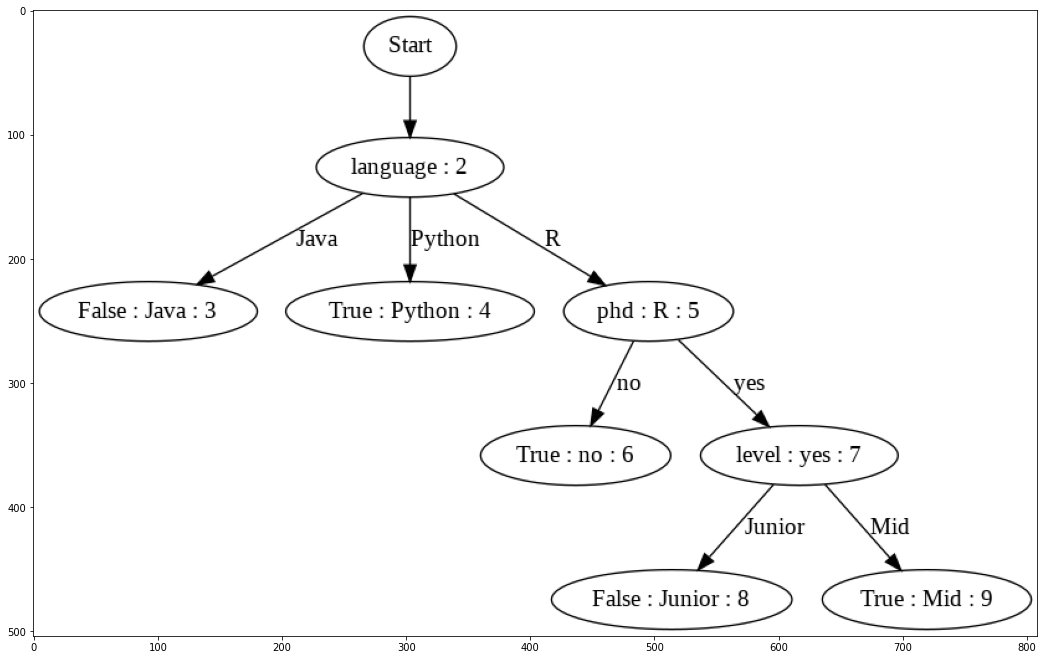

In [ ]:
dt1 = decisionTree(features_name_list, output_label_name, data_2_train, 'ID3')
dt1.Create_Tree([], [], 'Start')
dt1.Plot_Tree()

## 4.Create Decision Tree by C4.5 Algorithm

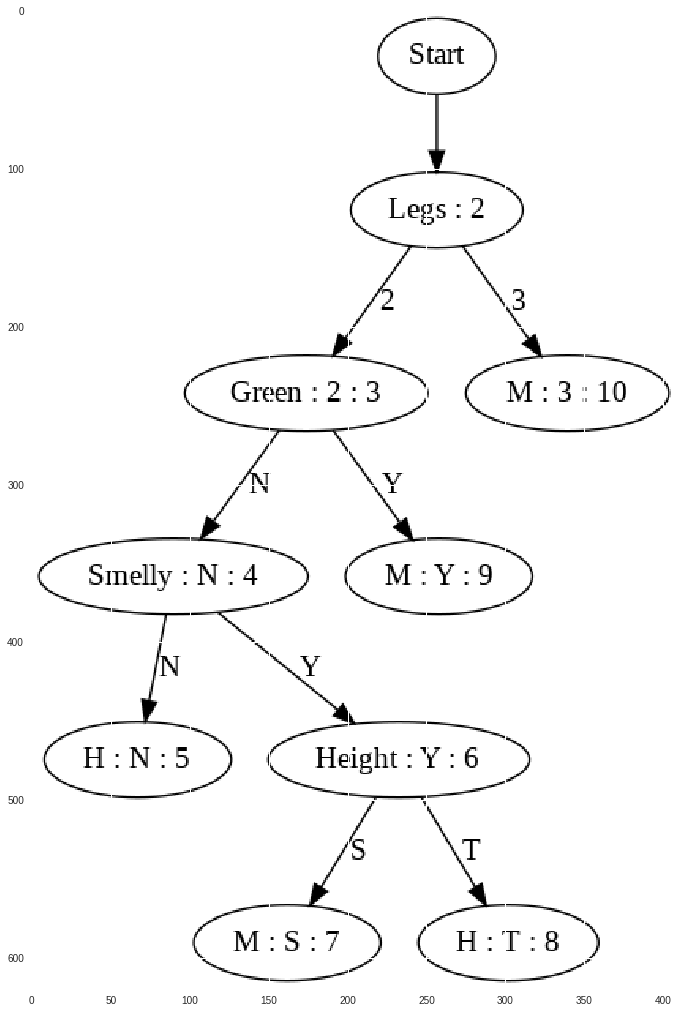

In [ ]:

dt2 = decisionTree(features_name_list, output_label_name, data_2_train, 'C4.5')
dt2.Create_Tree([], [], 'Start')
dt2.Plot_Tree()

## 5.N-Folds Cross Validation

In [ ]:
# N Fold Cross Validation
n = 9
record_number = data_2.shape[0]
print(record_number)
divide_result = math.floor(record_number / n)

partition_list = []
error = 0
for Fold in range(0, n):
    partition_list.append([Fold * divide_result, Fold * divide_result + divide_result])

print(partition_list)

for Fold in range(0, n-1):
    d = data_2
    d = d.drop(d.index[[partition_list[Fold][0], partition_list[Fold][1]]])
    dtree = decisionTree(features_name_list, output_label_name, d, 'C4.5')
    dtree.Create_Tree([], [], 'Start')
    validation = data_2.iloc[partition_list[Fold][0]:partition_list[Fold][1],:].copy()
    error += (dtree.accuracy_binary_class(validation , 'H', 'M'))
    #print (error)

print('N-Fold Cross Validation = ' + str(error/n))


9
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


N-Fold Cross Validation = 0.0
